In [133]:
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [134]:
energy_data = pd.read_csv("data/energy_demand_weather_hourly_spain/energy_dataset.csv")

energy_data.describe()

,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,generation hydro pumped storage aggregated,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
count,35045.000000,35046.000000,35046.0,35046.000000,35046.000000,35045.000000,35046.0,35046.0,35046.0,0.0,...,35045.000000,35046.0,35046.000000,35064.000000,0.0,35064.000000,35064.000000,35028.000000,35064.000000,35064.000000
mean,383.513540,448.059208,0.0,5622.737488,4256.065742,298.319789,0.0,0.0,0.0,NaN,...,269.452133,0.0,5464.479769,1439.066735,NaN,5471.216689,28712.129962,28696.939905,49.874341,57.884023
std,85.353943,354.568590,0.0,2201.830478,1961.601013,52.520673,0.0,0.0,0.0,NaN,...,50.195536,0.0,3213.691587,1677.703355,NaN,3176.312853,4594.100854,4574.987950,14.618900,14.204083
min,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,NaN,...,0.000000,0.0,0.000000,0.000000,NaN,237.000000,18105.000000,18041.000000,2.060000,9.330000
25%,333.000000,0.000000,0.0,4126.000000,2527.000000,263.000000,0.0,0.0,0.0,NaN,...,240.000000,0.0,2933.000000,69.000000,NaN,2979.000000,24793.750000,24807.750000,41.490000,49.347500
50%,367.000000,509.000000,0.0,4969.000000,4474.000000,300.000000,0.0,0.0,0.0,NaN,...,279.000000,0.0,4849.000000,576.000000,NaN,4855.000000,28906.000000,28901.000000,50.520000,58.020000
75%,433.000000,757.000000,0.0,6429.000000,5838.750000,330.000000,0.0,0.0,0.0,NaN,...,310.000000,0.0,7398.000000,2636.000000,NaN,7353.000000,32263.250000,32192.000000,60.530000,68.010000
max,592.000000,999.000000,0.0,20034.000000,8359.000000,449.000000,0.0,0.0,0.0,NaN,...,357.000000,0.0,17436.000000,5836.000000,NaN,17430.000000,41390.000000,41015.000000,101.990000,116.800000


In [135]:
weather_features = pd.read_csv("data/energy_demand_weather_hourly_spain/weather_features.csv")

weather_features.describe()

,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id
count,178396.000000,178396.000000,178396.000000,1.783960e+05,178396.000000,178396.00000,178396.000000,178396.000000,178396.000000,178396.000000,178396.000000,178396.000000
mean,289.618605,288.330442,291.091267,1.069261e+03,68.423457,2.47056,166.591190,0.075492,0.000380,0.004763,25.073292,759.831902
std,8.026199,7.955491,8.612454,5.969632e+03,21.902888,2.09591,116.611927,0.398847,0.007288,0.222604,30.774129,108.733223
min,262.240000,262.240000,262.240000,0.000000e+00,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,200.000000
25%,283.670000,282.483602,284.650000,1.013000e+03,53.000000,1.00000,55.000000,0.000000,0.000000,0.000000,0.000000,800.000000
50%,289.150000,288.150000,290.150000,1.018000e+03,72.000000,2.00000,177.000000,0.000000,0.000000,0.000000,20.000000,800.000000
75%,295.150000,293.730125,297.150000,1.022000e+03,87.000000,4.00000,270.000000,0.000000,0.000000,0.000000,40.000000,801.000000
max,315.600000,315.150000,321.150000,1.008371e+06,100.000000,133.00000,360.000000,12.000000,2.315000,21.500000,100.000000,804.000000


### Set up dataset

In [136]:
# The time is provided in spanish timezone CET
energy_data["time"] = pd.to_datetime(energy_data["time"], utc=True).dt.tz_convert('CET')

# Set time as index
energy_data.set_index("time", inplace=True)

### EDA: Plot the energy consumption over time

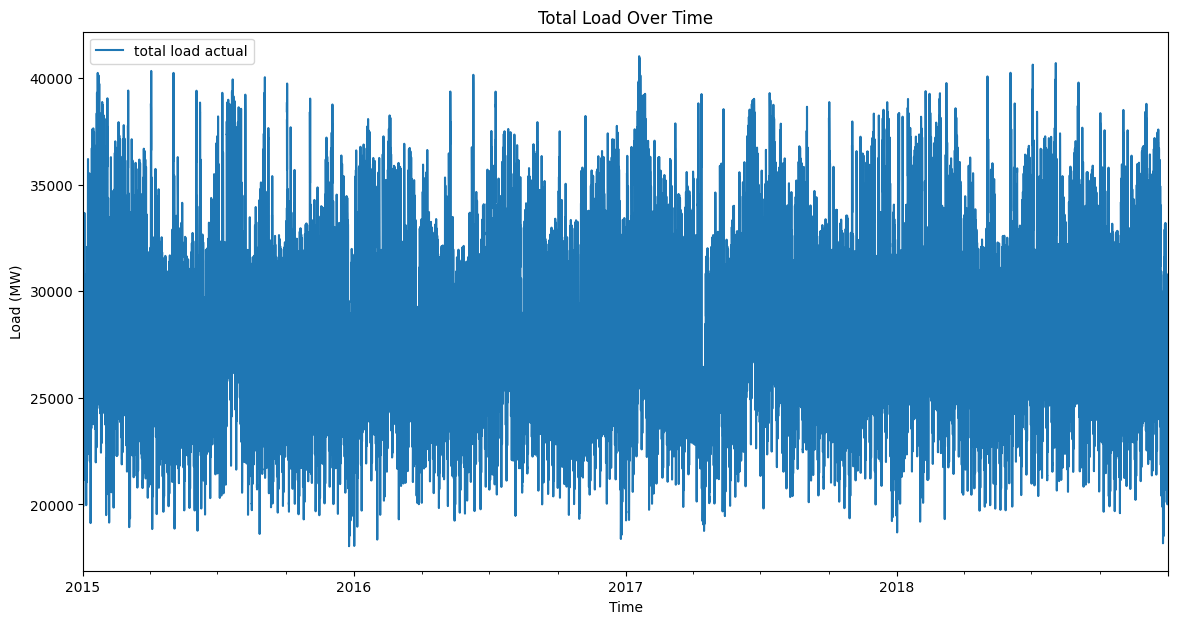

In [137]:
# General plot of total load over time
plt.figure(figsize=(14, 7))
energy_data.plot(y="total load actual", ax=plt.gca())
plt.title("Total Load Over Time")
plt.ylabel("Load (MW)")
plt.xlabel("Time")
plt.show()

In [138]:
energy_data.columns

Index(['generation biomass', 'generation fossil brown coal/lignite',
       'generation fossil coal-derived gas', 'generation fossil gas',
       'generation fossil hard coal', 'generation fossil oil',
       'generation fossil oil shale', 'generation fossil peat',
       'generation geothermal', 'generation hydro pumped storage aggregated',
       'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation marine',
       'generation nuclear', 'generation other', 'generation other renewable',
       'generation solar', 'generation waste', 'generation wind offshore',
       'generation wind onshore', 'forecast solar day ahead',
       'forecast wind offshore eday ahead', 'forecast wind onshore day ahead',
       'total load forecast', 'total load actual', 'price day ahead',
       'price actual'],
      dtype='object')

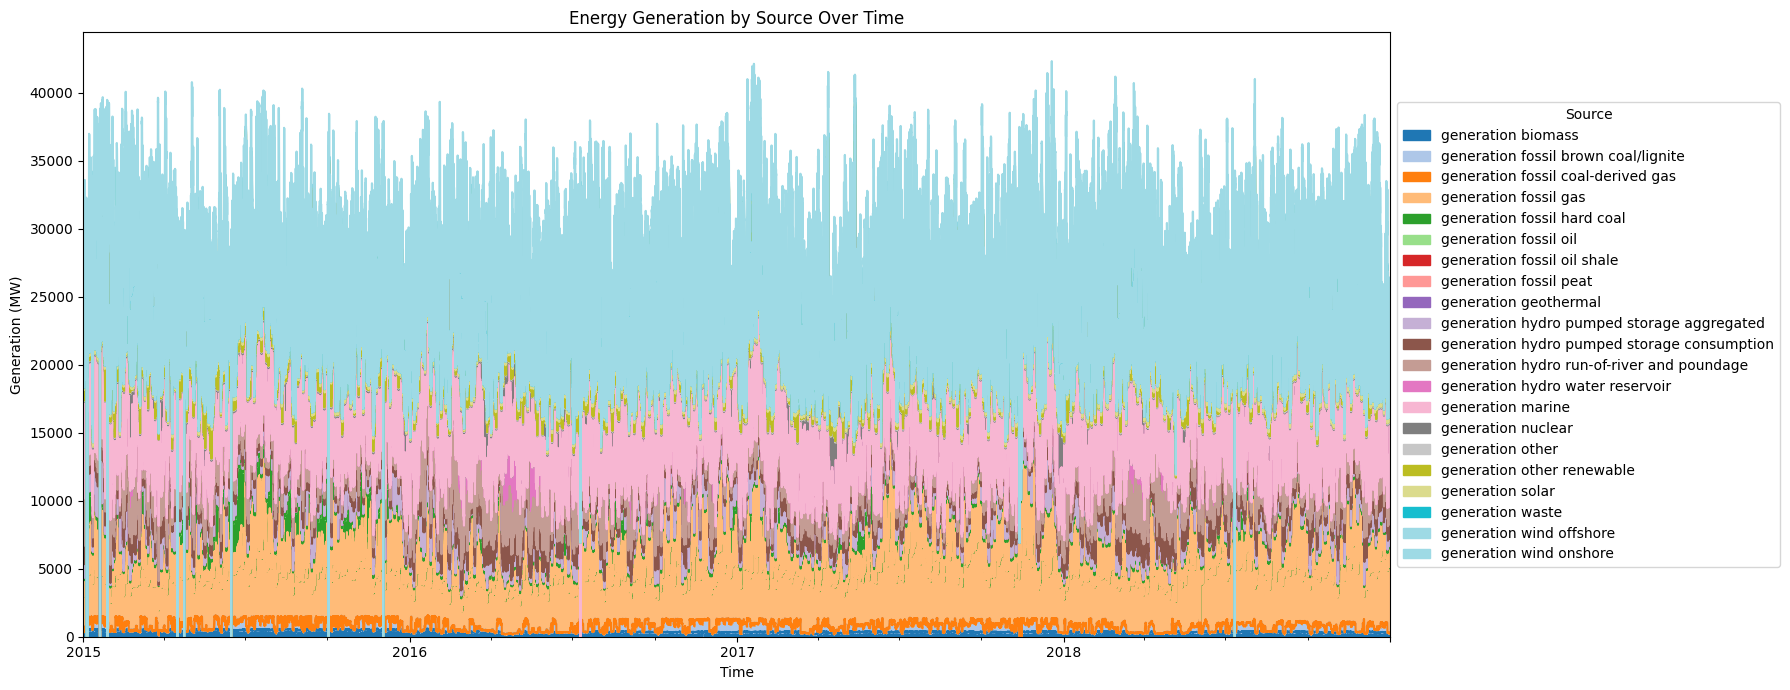

In [139]:
# Create dataframe of only the energy sources
energy_sources = energy_data.drop(columns=["forecast solar day ahead", "forecast wind offshore eday ahead", 
                                           'forecast wind onshore day ahead', 'total load forecast', 
                                           "total load actual", 'price day ahead','price actual'])


# Define a color map - 'tab20' is a qualitative color map suitable for different categories
colors = plt.cm.tab20(np.linspace(0, 1, len(energy_sources.columns)))

plt.figure(figsize=(18, 7))
ax = energy_sources.plot.area(stacked=True, color=colors, ax=plt.gca())

# Place the legend outside the plot
ax.legend(title="Source", loc="center left", bbox_to_anchor=(1, 0.5))

plt.title("Energy Generation by Source Over Time")
plt.ylabel("Generation (MW)")
plt.xlabel("Time")
plt.tight_layout()  # Ensure the plot fits well even with the legend outside
plt.show()

In [140]:
# Looking at the above plot, it may make sense to group more broadly- by fossil fuel, hydro, etc
print(energy_sources.columns)

# Regrouping data
energy_sources_grouped = pd.DataFrame({
    "Fossil Fuels": energy_sources[['generation fossil brown coal/lignite', 'generation fossil coal-derived gas', 
                                    'generation fossil gas', 'generation fossil hard coal', 'generation fossil oil', 
                                    'generation fossil oil shale', 'generation fossil peat']].sum(axis=1),
    "Hydro": energy_sources[['generation hydro pumped storage aggregated', 'generation hydro pumped storage consumption',
                             'generation hydro run-of-river and poundage', 'generation hydro water reservoir']].sum(axis=1),
    "Wind & Solar": energy_sources[['generation wind offshore', 'generation wind onshore', 'generation solar', 
                                    'generation other renewable']].sum(axis=1),
    "Other": energy_sources[['generation biomass', 'generation geothermal', 'generation marine', 
                             'generation other', 'generation waste']].sum(axis=1),
    "Nuclear": energy_sources['generation nuclear']
})


Index(['generation biomass', 'generation fossil brown coal/lignite',
       'generation fossil coal-derived gas', 'generation fossil gas',
       'generation fossil hard coal', 'generation fossil oil',
       'generation fossil oil shale', 'generation fossil peat',
       'generation geothermal', 'generation hydro pumped storage aggregated',
       'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation marine',
       'generation nuclear', 'generation other', 'generation other renewable',
       'generation solar', 'generation waste', 'generation wind offshore',
       'generation wind onshore'],
      dtype='object')


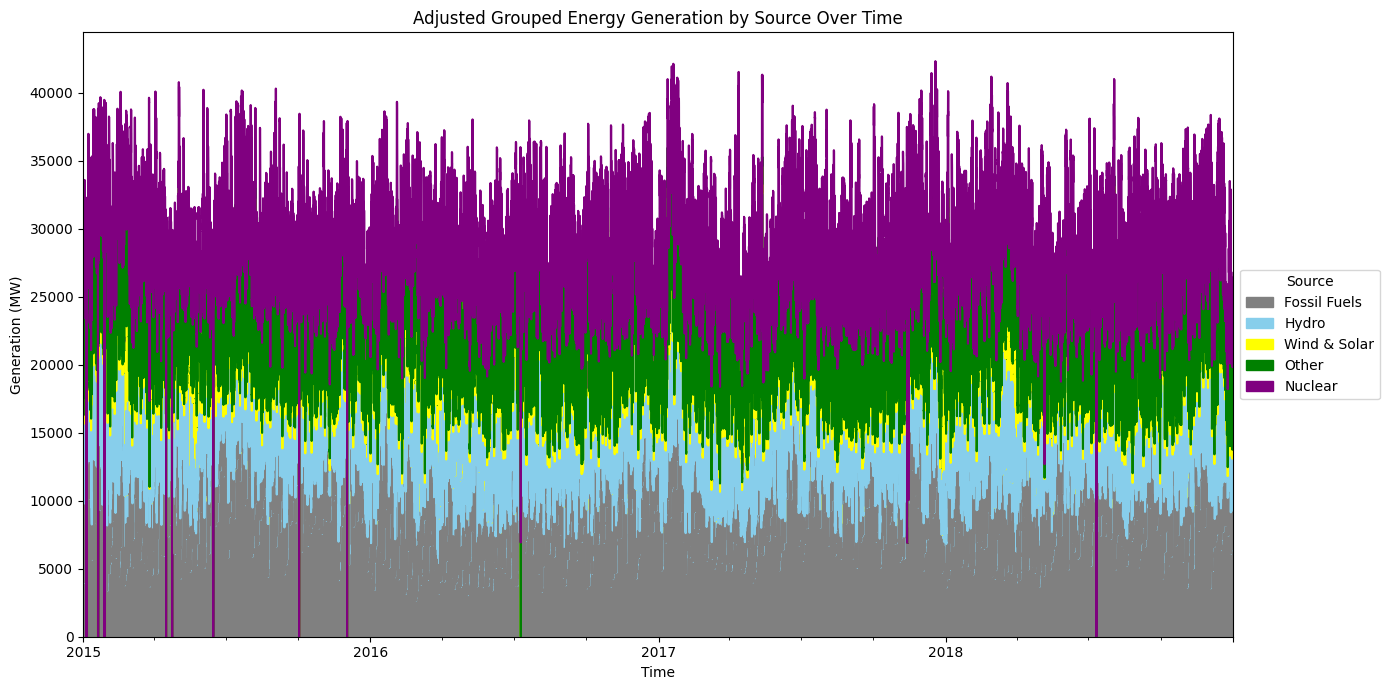

In [141]:
# Plotting the regrouped data
# Custom color mapping
custom_colors = {
    "Fossil Fuels": "gray",
    "Hydro": "skyblue",
    "Wind & Solar": "yellow",
    "Other": "green",
    "Nuclear": "purple"
}

plt.figure(figsize=(14, 7))
ax = energy_sources_grouped.plot.area(stacked=True, color=[custom_colors[col] for col in energy_sources_grouped.columns], ax=plt.gca())
ax.legend(title="Source", loc="center left", bbox_to_anchor=(1, 0.5))

plt.title("Adjusted Grouped Energy Generation by Source Over Time")
plt.ylabel("Generation (MW)")
plt.xlabel("Time")
plt.tight_layout()
plt.show()


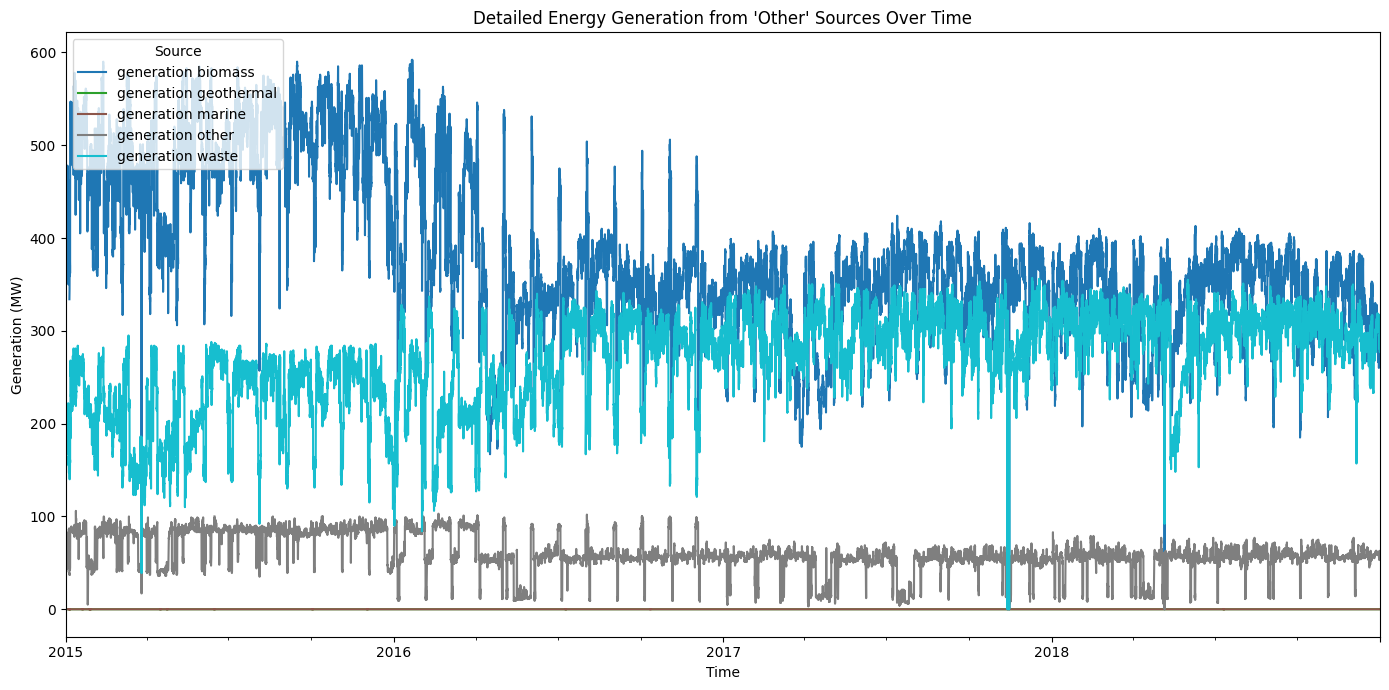

In [142]:
# The "Other" category is a larger fraction than expected, so let's zoom in on just the "Other" energy sources
# Extracting the "Other" category data
other_sources = energy_sources[['generation biomass', 'generation geothermal', 'generation marine', 
                                'generation other', 'generation waste']]

# Plotting
plt.figure(figsize=(14, 7))
colors = plt.cm.tab10(np.linspace(0, 1, len(other_sources.columns)))
other_sources.plot(ax=plt.gca(), color=colors)

plt.title("Detailed Energy Generation from 'Other' Sources Over Time")
plt.ylabel("Generation (MW)")
plt.xlabel("Time")
plt.legend(title="Source", loc="upper left")
plt.tight_layout()
plt.show()


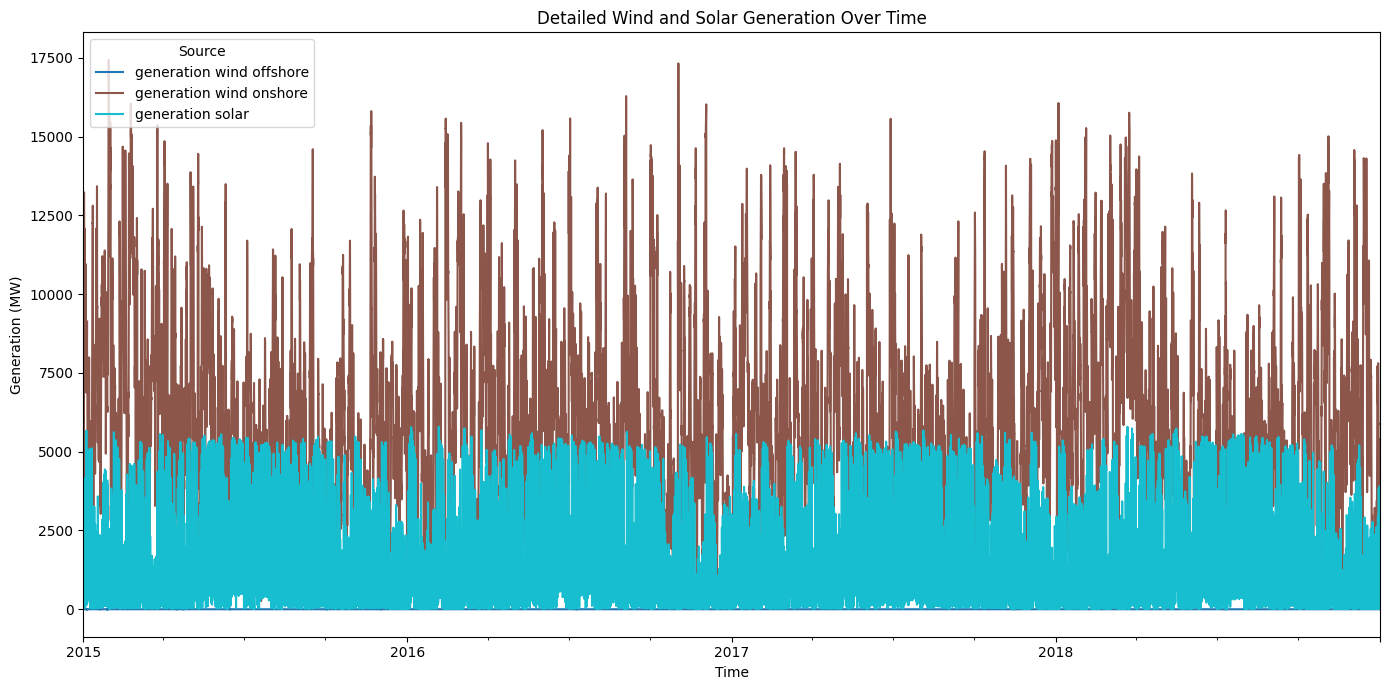

In [143]:
# Out of curiousity, I want to zoom in on the wind and solar generation sources

wind_and_solar_separate = energy_sources[["generation wind offshore", "generation wind onshore", "generation solar"]]

plt.figure(figsize=(14, 7))
colors = plt.cm.tab10(np.linspace(0, 1, len(wind_and_solar_separate.columns)))
wind_and_solar_separate.plot(ax=plt.gca(), color=colors)

plt.title("Detailed Wind and Solar Generation Over Time")
plt.ylabel("Generation (MW)")
plt.xlabel("Time")
plt.legend(title="Source", loc="upper left")
plt.tight_layout()
plt.show()


In [177]:
total_generation = energy_sources_grouped.sum(axis=1)
wind_solar = energy_sources_grouped["Wind & Solar"]
fraction_wind_solar = wind_solar / total_generation
dominant_time = fraction_wind_solar.idxmax()

print(f"Wind & Solar had the largest fraction of energy generation on {dominant_time.strftime('%Y-%m-%d')} with a fraction of {fraction_wind_solar[dominant_time]:.2%}.")


Wind & Solar had the largest fraction of energy generation on 2016-07-02 with a fraction of 57.63%.


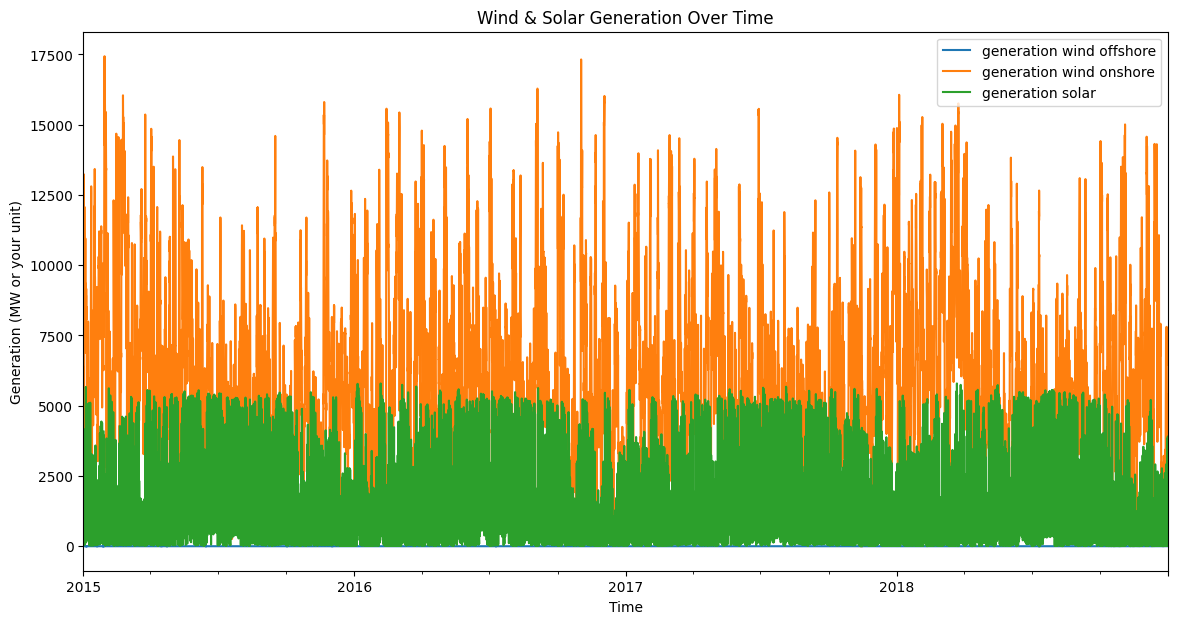

In [145]:
wind_and_solar_separate.plot(figsize=(14, 7))
plt.title("Wind & Solar Generation Over Time")
plt.ylabel("Generation (MW or your unit)")
plt.xlabel("Time")
plt.show()

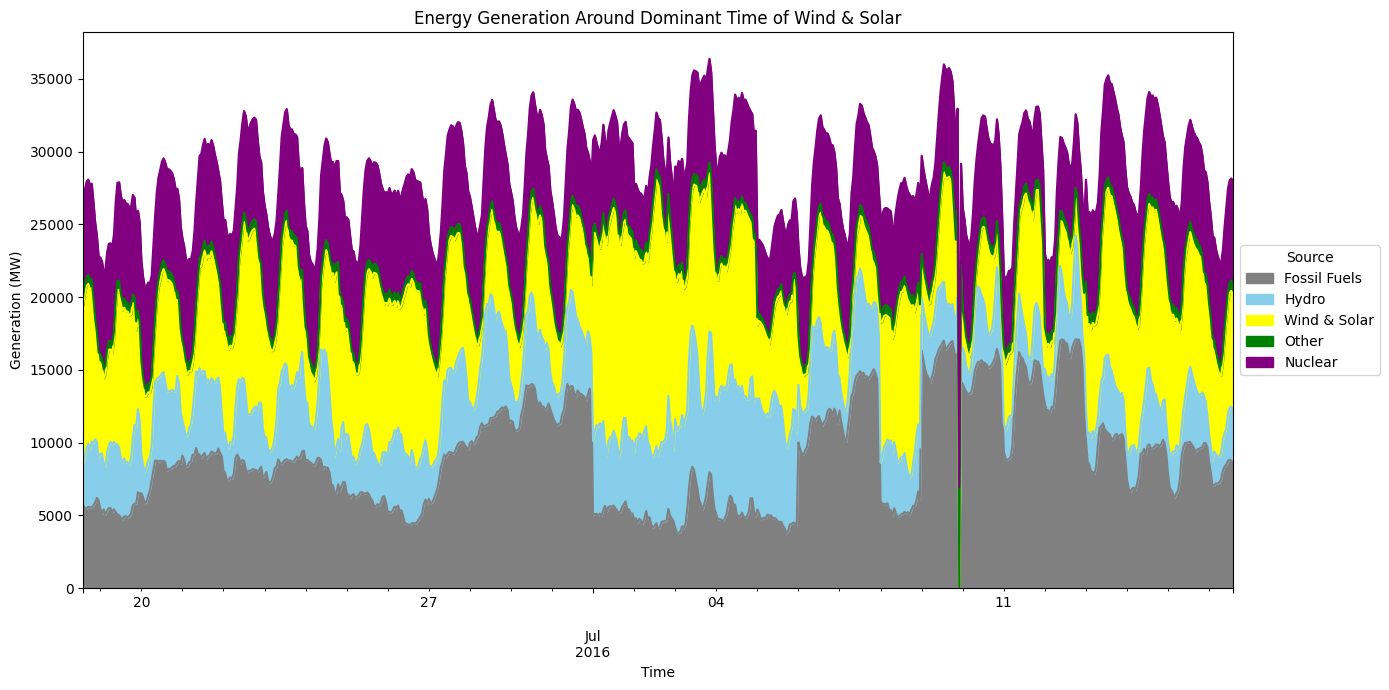

In [146]:
# Extract the time window of interest
start_date = dominant_time - timedelta(days=14)   # Two weeks before the dominant time
end_date = dominant_time + timedelta(days=14)    # Two weeks after the dominant time
subset_data = energy_sources_grouped.loc[start_date:end_date]

# Plotting
colors = plt.cm.tab10(np.linspace(0, 1, len(subset_data.columns)))

plt.figure(figsize=(14, 7))
ax = subset_data.plot.area(stacked=True, color=[custom_colors[col] for col in energy_sources_grouped.columns], ax=plt.gca())
ax.legend(title="Source", loc="center left", bbox_to_anchor=(1, 0.5))

plt.title("Energy Generation Around Dominant Time of Wind & Solar")
plt.ylabel("Generation (MW)")
plt.xlabel("Time")
plt.tight_layout()
plt.show()


In [165]:
energy_sources_grouped["Wind & Solar"]

time
2015-01-01 00:00:00+01:00    6500.0
2015-01-01 01:00:00+01:00    6011.0
2015-01-01 02:00:00+01:00    5584.0
2015-01-01 03:00:00+01:00    5363.0
2015-01-01 04:00:00+01:00    5051.0
                              ...  
2018-12-31 19:00:00+01:00    3293.0
2018-12-31 20:00:00+01:00    3416.0
2018-12-31 21:00:00+01:00    3628.0
2018-12-31 22:00:00+01:00    3710.0
2018-12-31 23:00:00+01:00    3774.0
Name: Wind & Solar, Length: 35064, dtype: float64

/var/folders/x0/bk3p3l3n03dbdfrh_pj34p3r0000gp/T/ipykernel_63006/3986993842.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wind_solar_df['hour'] = wind_solar_df.index.hour
/var/folders/x0/bk3p3l3n03dbdfrh_pj34p3r0000gp/T/ipykernel_63006/3986993842.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wind_solar_df['year'] = wind_solar_df.index.year


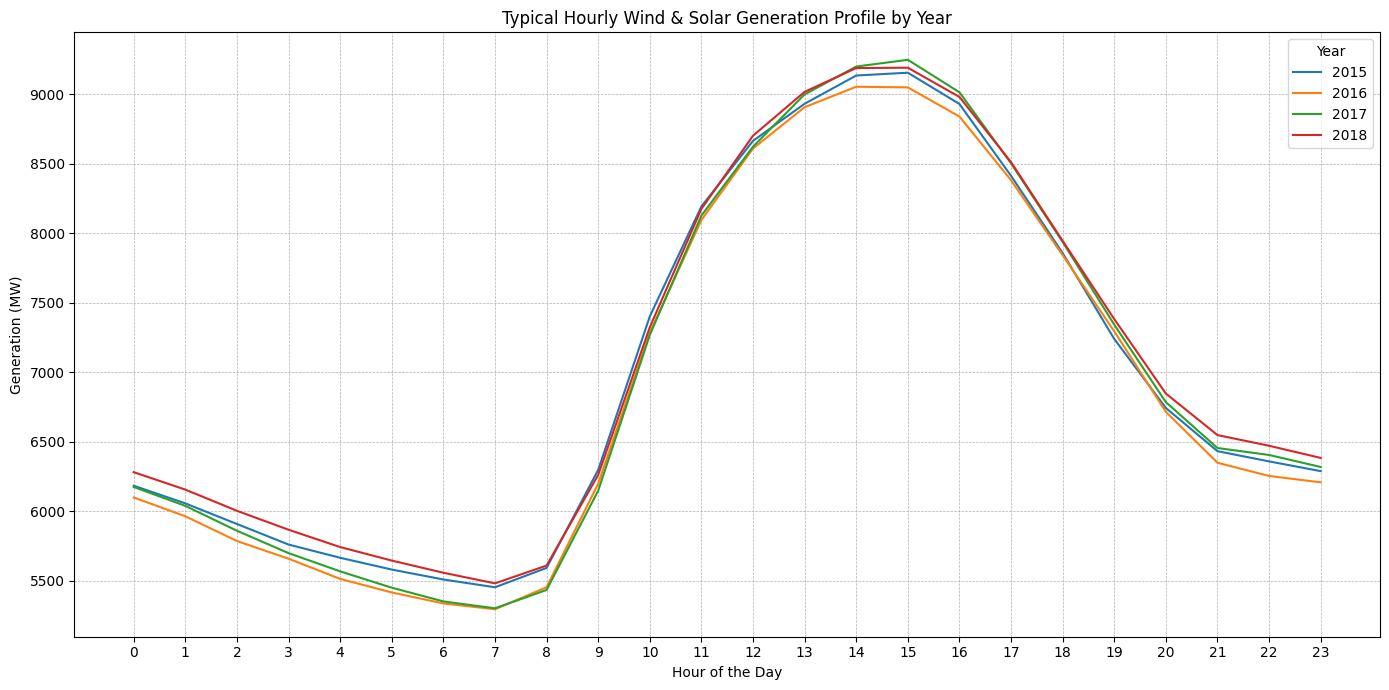

In [176]:
wind_solar_df = energy_sources_grouped[["Wind & Solar"]]

# Extract hour of the day and year directly into the wind_solar dataframe
wind_solar_df['hour'] = wind_solar_df.index.hour
wind_solar_df['year'] = wind_solar_df.index.year

# Group by year and hour
hourly_means = wind_solar_df.groupby(['year', 'hour']).mean()

# Plot
plt.figure(figsize=(14, 7))

# For each year, plot the hourly profile
for year in wind_solar_df['year'].unique():
    plt.plot(hourly_means.loc[year], label=year)

plt.title("Typical Hourly Wind & Solar Generation Profile by Year")
plt.ylabel("Generation (MW)")
plt.xlabel("Hour of the Day")
plt.xticks(range(0, 24))
plt.legend(title="Year")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.show()


/var/folders/x0/bk3p3l3n03dbdfrh_pj34p3r0000gp/T/ipykernel_63006/1270748457.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  solar_df['hour'] = solar_df.index.hour
/var/folders/x0/bk3p3l3n03dbdfrh_pj34p3r0000gp/T/ipykernel_63006/1270748457.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  solar_df['year'] = solar_df.index.year


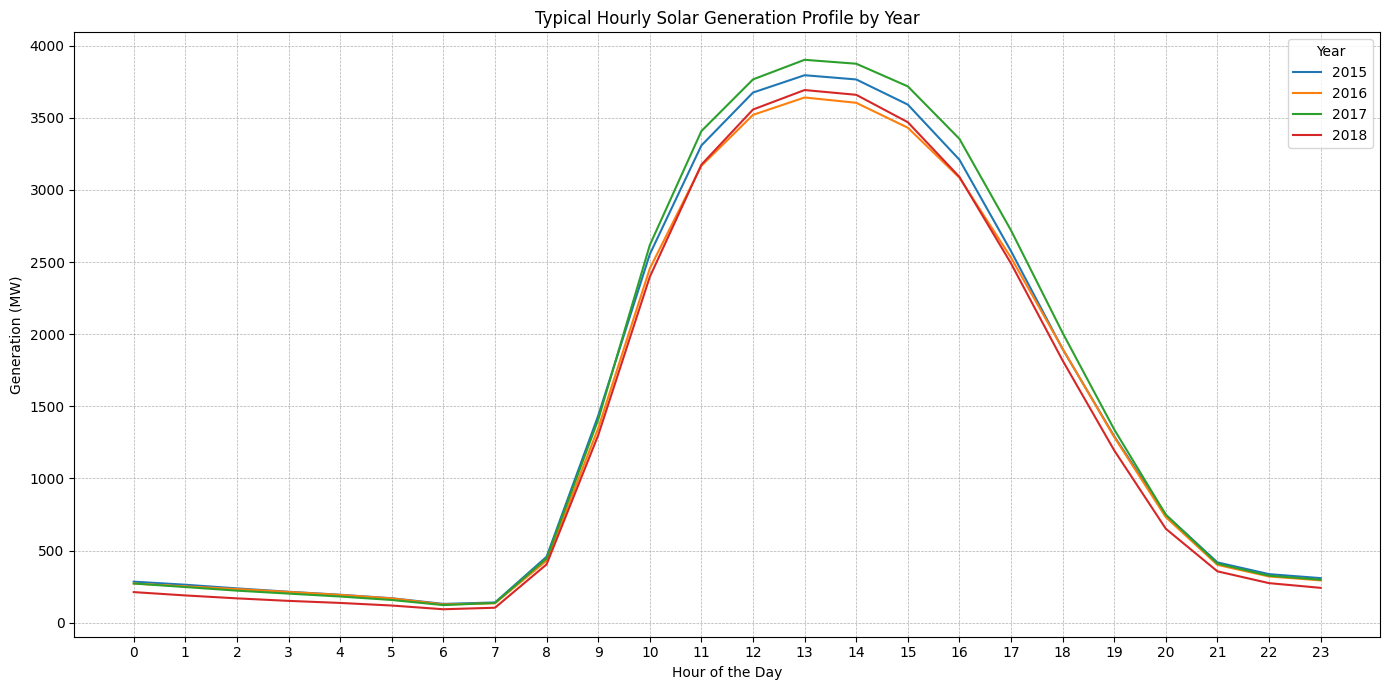

In [179]:
solar_df = energy_sources[["generation solar"]]

# Extract hour of the day and year directly into the wind_solar dataframe
solar_df['hour'] = solar_df.index.hour
solar_df['year'] = solar_df.index.year

# Group by year and hour
hourly_means = solar_df.groupby(['year', 'hour']).mean()

# Plot
plt.figure(figsize=(14, 7))

# For each year, plot the hourly profile
for year in solar_df['year'].unique():
    plt.plot(hourly_means.loc[year], label=year)

plt.title("Typical Hourly Solar Generation Profile by Year")
plt.ylabel("Generation (MW)")
plt.xlabel("Hour of the Day")
plt.xticks(range(0, 24))
plt.legend(title="Year")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.show()

#### Notes and Observations
- Wind and solar make up a relatively small portion of the Spanish energy grid. Of the two, onshore wind generation is the larger portion
    - Wind and solar generation do not appear to increase year-over year. I was expecting some increase year-over-year as renewables become cheaper to make and install. This appears true when looking at solar alone as well. 
    - Despite solar prices going down, the grid does not appear to have had a significant increase in solar production
- Fossil fuels make up approx 25% of the grid make up
- Nuclear is a large portion, almost half of the energy grid make up
- Hydro makes up a larger portion than I was expecting
- Biomass and waste are small but important components to the energy grid make up